# <center> Final Project VIX Kalbe Nutritionals
<center> by Vicky Tanamal

# Import Library

In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [136]:
df_transaction = pd.read_csv('Case Study - Transaction.csv', sep=';')
df_store = pd.read_csv('Case Study - Store.csv', sep=';')
df_product = pd.read_csv('Case Study - Product.csv', sep=';')
df_customer = pd.read_csv('Case Study - Customer.csv', sep=';')

# Data Cleaning

In [137]:
# Overview data
print(df_transaction.head(3))
print(df_store.head(3))
print(df_product.head(3))
print(df_customer.head(3))

  TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   

   StoreID  
0       12  
1        1  
2        4  
   StoreID         StoreName GroupStore          Type   Latitude   Longitude
0        1     Prima Tendean      Prima  Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima  Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima  Modern Trade  -7,797068  110,370529
  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   

In [138]:
# Info data
print(df_transaction.info())
print(df_store.info())
print(df_product.info())
print(df_customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-n

In [139]:
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

There are missing values in Marital Status in df_customer. Because the missing values are in categorical column, we can use MODE to fill the NULL data.

In [140]:
df_customer = df_customer.apply(lambda x: x.fillna(x.mode()[0]))
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [141]:
# Change data type
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])
df_store['Latitude'] = df_store['Latitude'].str.replace(',','.').astype(float)
df_store['Longitude'] = df_store['Longitude'].str.replace(',','.').astype(float)
df_customer['Income'] = df_customer['Income'].str.replace(',','.').astype(float)

In [142]:
# Merge data
merged_df = pd.merge(df_transaction, df_store, on='StoreID', how='inner')
merged_df = pd.merge(merged_df, df_product, on='ProductID', how='inner')
merged_df = pd.merge(merged_df, df_customer, on='CustomerID', how='inner')

In [143]:
merged_df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,7500,36,0,Married,10.53
1,TR57013,328,2022-09-15,P7,9400,6,56400,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,Coffee Candy,9400,36,0,Married,10.53
2,TR97172,328,2022-05-21,P1,8800,5,44000,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,Choco Bar,8800,36,0,Married,10.53
3,TR67395,328,2022-01-22,P8,16000,3,48000,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,Oat,16000,36,0,Married,10.53
4,TR45738,328,2022-12-29,P2,3200,3,9600,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,Ginger Candy,3200,36,0,Married,10.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR37670,193,2022-09-26,P5,4200,2,8400,7,Buana Indah,Buana,General Trade,3.316694,114.590111,Thai Tea,4200,42,0,Married,20.64
5016,TR98043,385,2022-06-27,P2,3200,7,22400,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,Ginger Candy,3200,41,1,Married,15.84
5017,TR91332,385,2022-09-01,P9,10000,1,10000,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513,Yoghurt,10000,41,1,Married,15.84
5018,TR88968,385,2022-08-21,P9,10000,6,60000,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643,Yoghurt,10000,41,1,Married,15.84


In [144]:
# Drop same column
merged_df.drop('Price_y', axis=1, inplace=True)

In [145]:
merged_df

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,36,0,Married,10.53
1,TR57013,328,2022-09-15,P7,9400,6,56400,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,Coffee Candy,36,0,Married,10.53
2,TR97172,328,2022-05-21,P1,8800,5,44000,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,Choco Bar,36,0,Married,10.53
3,TR67395,328,2022-01-22,P8,16000,3,48000,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,Oat,36,0,Married,10.53
4,TR45738,328,2022-12-29,P2,3200,3,9600,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,Ginger Candy,36,0,Married,10.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR37670,193,2022-09-26,P5,4200,2,8400,7,Buana Indah,Buana,General Trade,3.316694,114.590111,Thai Tea,42,0,Married,20.64
5016,TR98043,385,2022-06-27,P2,3200,7,22400,11,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,Ginger Candy,41,1,Married,15.84
5017,TR91332,385,2022-09-01,P9,10000,1,10000,10,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513,Yoghurt,41,1,Married,15.84
5018,TR88968,385,2022-08-21,P9,10000,6,60000,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643,Yoghurt,41,1,Married,15.84


In [146]:
# Check Merged data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   StoreName       5020 non-null   object        
 9   GroupStore      5020 non-null   object        
 10  Type            5020 non-null   object        
 11  Latitude        5020 non-null   float64       
 12  Longitude       5020 non-null   float64       
 13  Product Name    5020 non-null   object        
 14  Age             5020 non-null   int64         
 15  Gend

# Time Series Modelling

## ARIMA Time Series

In [147]:
df_ts = merged_df.groupby('Date')['Qty'].sum().reset_index()
df_ts.set_index('Date',inplace=True)
df_ts

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


Text(0.5, 1.0, 'Sales Qty in a Year')

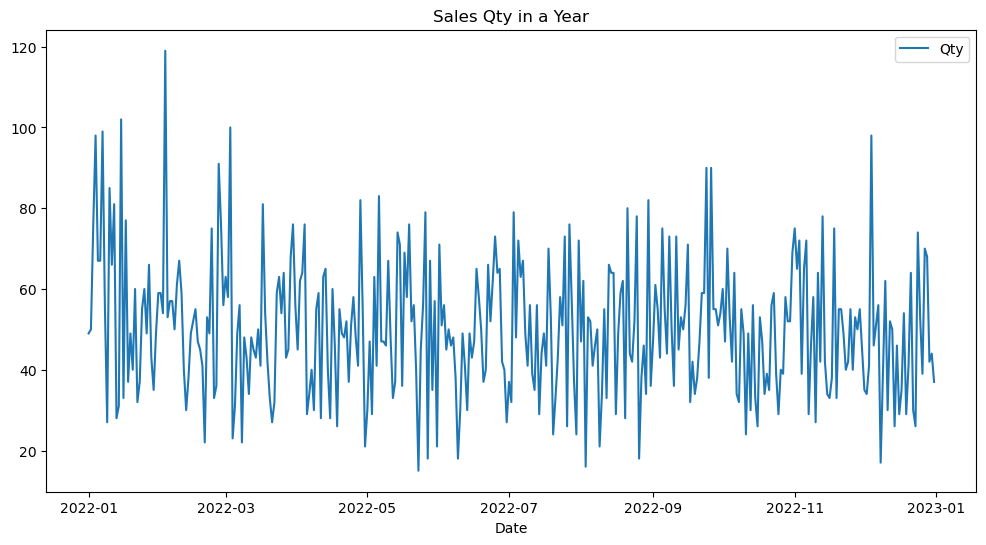

In [148]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ts)
plt.title('Sales Qty in a Year')

In [149]:
# Splitting data train and test
print(df_ts.shape)
ts_train = df_ts.iloc[:-92] # First 9 months for training
ts_test = df_ts.iloc[-92:] # Last 3 months for testing
print(ts_train.shape,ts_test.shape)

(365, 1)
(273, 1) (92, 1)


In [150]:
ts_train.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


In [151]:
ts_test.head()

,Qty
Date,
2022-10-01,60
2022-10-02,47
2022-10-03,70
2022-10-04,53
2022-10-05,42


In [152]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [153]:
#Ho: It is non stationary
#H1: It is stationary

alpha = 0.05
adfuller_pvalue = adfuller(ts_train['Qty'])[1]

if adfuller_pvalue <= alpha:
    print('Reject Ho. The data is stationary')
    print(adfuller_pvalue)
else:
    print('Fail to reject Ho. The data is not stationary')
    print(adfuller_pvalue)

Reject Ho. The data is stationary
2.196798698750553e-29


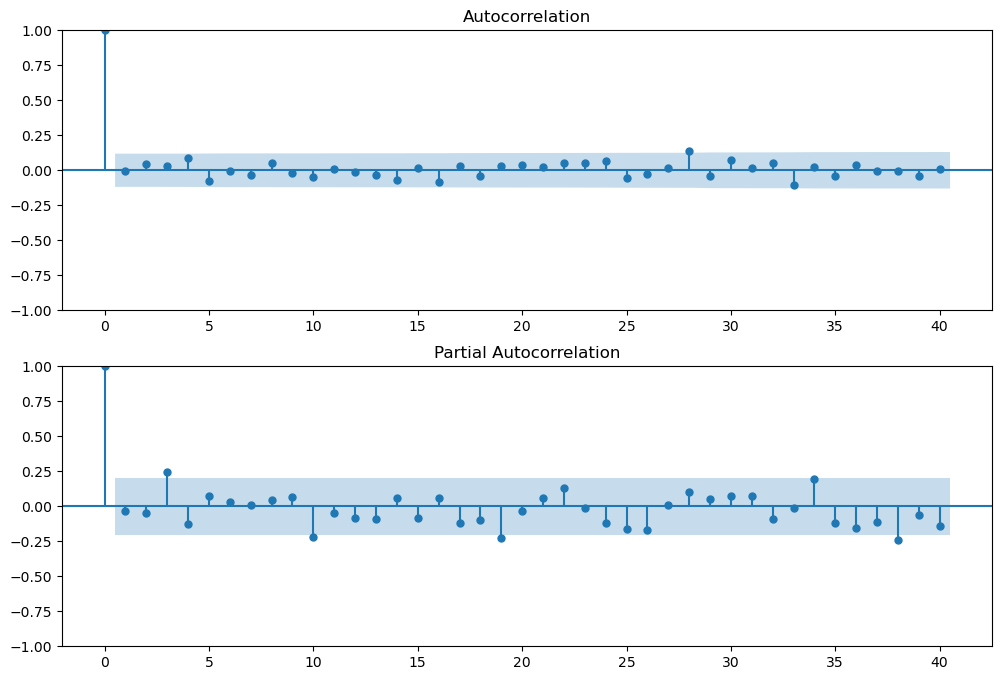

In [154]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_train,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_test,lags=40,ax=ax2)

In [155]:
model=sm.tsa.statespace.SARIMAX(ts_train,order=(3, 0, 2),
                                 seasonal_order=(1,1,0,7))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                Qty   No. Observations:                  273
Model:             SARIMAX(3, 0, 2)x(1, 1, [], 7)   Log Likelihood               -1187.966
Date:                            Wed, 06 Sep 2023   AIC                           2389.933
Time:                                    21:12:38   BIC                           2415.017
Sample:                                01-01-2022   HQIC                          2400.010
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2921      0.283      1.032      0.302      -0.263       0.847
ar.L2          0.6759      0.243      2.785      0.005       0.200       1.152
ar.L3         -0.1277      0.068     -1.882      0.060      -0.261       0.005
ma.L1         -0.3252      0.290     -1.122      0.262      -0.894       0.243
ma.L2         -0.6432      0.286     -2.247      0.025      -1.204      -0.082
ar.S.L7       -0.4737      0.055     -8.619      0.000      -0.581      -0.366
sigma2       438.3956     39.645     11.058      0.000     360.692     516.099
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 4.91
Prob(Q):                              0.75   Prob(JB):                         0.09
Heteroskedasticity (H):               0.70   Skew:                             0.32
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
start = len(ts_train)
end = len(ts_train)+len(ts_test)-1
y_pred = results.predict(start=start, end=end, type='levels')
y_pred.index = ts_test.index
y_pred.head()

Date
2022-10-01    54.247028
2022-10-02    36.553740
2022-10-03    58.266306
2022-10-04    44.225538
2022-10-05    47.322581
Name: predicted_mean, dtype: float64

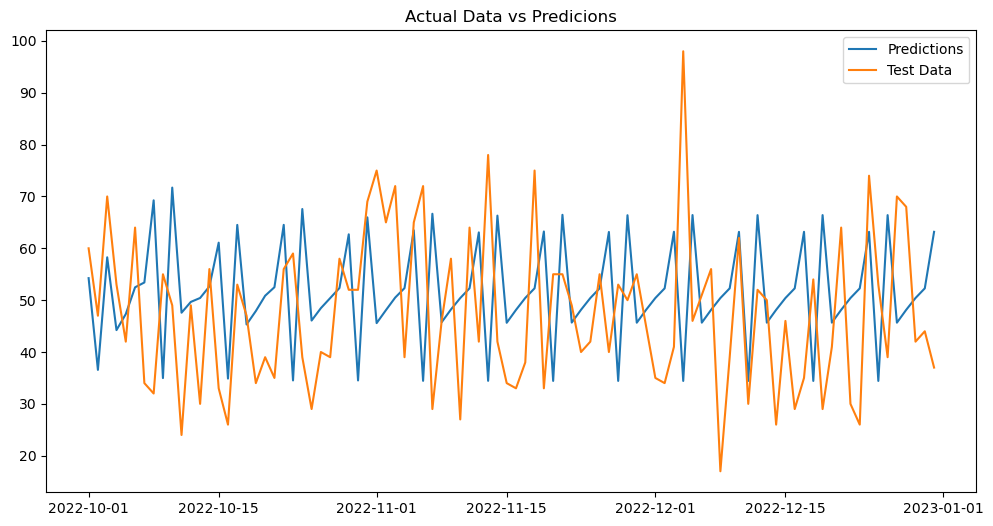

In [157]:
plt.figure(figsize=(12,6))
plt.plot(y_pred, label='Predictions')
plt.plot(ts_test, label='Test Data')
plt.title('Actual Data vs Predicions')
plt.legend()

In [158]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def rmse(y_actual, y_pred):
  print(f'RMSE Value: {mean_squared_error(y_actual, y_pred)**0.5}')
def rsquare(y_actual, y_pred):
  print(f'R-squared Value: {r2_score(y_actual, y_pred)}')
def eval(y_actual, y_pred):
  rmse(y_actual, y_pred)
  rsquare(y_actual, y_pred)
  print(f'MAE Value: {mean_absolute_error(y_actual, y_pred)}')

In [159]:
eval(ts_test['Qty'], y_pred)

RMSE Value: 19.69852579129112
R-squared Value: -0.7496914917708499
MAE Value: 16.405871447185074


### Forecast

In [179]:
index_future_dates = pd.date_range(start='2022-12-31', end='2023-12-31')
final_pred= results.predict(start=len(df_ts), end=len(df_ts)+365, type='levels').rename('SARIMA Predictions')
final_pred.index = index_future_dates

<Axes: >

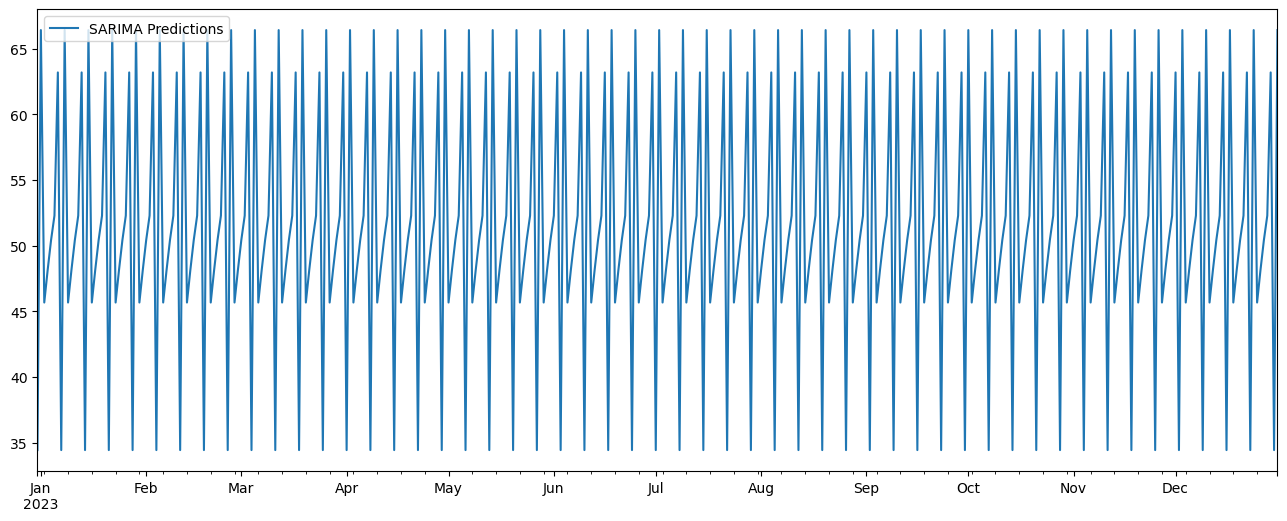

In [180]:
final_pred.plot(figsize=(16,6), legend=True)

In [181]:
final_pred_df = pd.DataFrame(final_pred)

In [182]:
full_df = pd.concat([df_ts,final_pred_df], axis=0)

<Axes: title={'center': 'SARIMA Predictions'}>

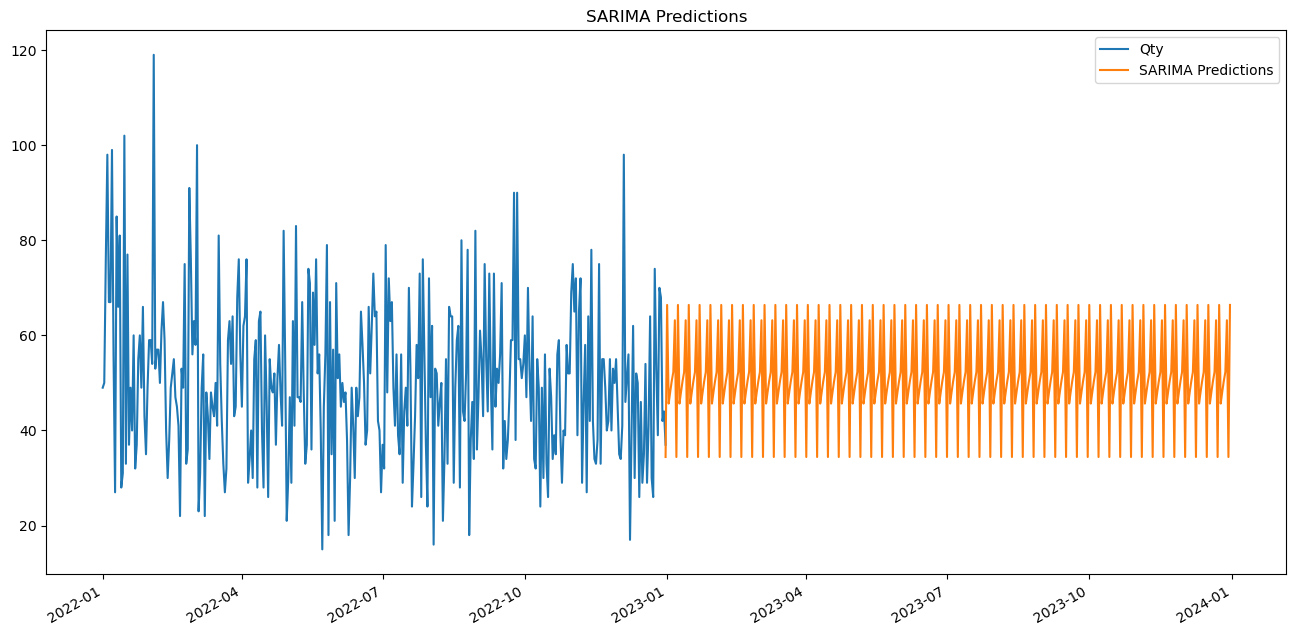

In [184]:
full_df.plot(figsize=(16, 8), legend=True, title='SARIMA Predictions')

# Clustering Modelling

In [165]:
clustering_df = merged_df.groupby('CustomerID').agg({'TransactionID':'count',
                                                     'Qty':'sum',
                                                     'TotalAmount':'sum'}).reset_index()
clustering_df

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [166]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [167]:
# Standarisasi Data
features = clustering_df.iloc[:, 1:]
fs_cols = features.columns

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_features_scaled = pd.DataFrame(data=features_scaled, columns=fs_cols)
df_features_scaled

,TransactionID,Qty,TotalAmount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347
...,...,...,...
442,1.471333,1.418049,0.984681
443,2.088298,1.653484,1.728488
444,2.088298,2.124352,1.804796
445,-0.071082,0.083921,0.488275


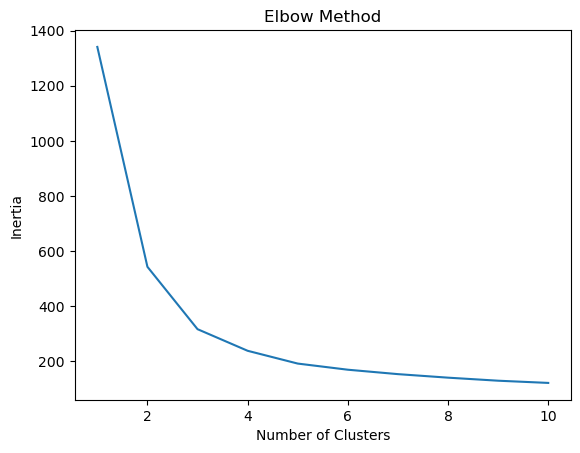

In [168]:
# Using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Clustering with n=4

In [169]:
clusters = 4

# Fit K-Means model
kmeans = KMeans(n_clusters=clusters, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

# Get cluster assignments for each data point
clustering_df['Cluster'] = cluster_labels

In [170]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(clustering_df, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3177554917332133


### Clustering with n=3

In [171]:
clusters = 3

# Fit K-Means model
kmeans = KMeans(n_clusters=clusters, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

# Get cluster assignments for each data point
clustering_df['Cluster'] = cluster_labels

In [172]:
silhouette_avg = silhouette_score(clustering_df, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.40585912730645


Silhouette score when n = 3 is higher than n = 4, so we use n = 3 for clustering.

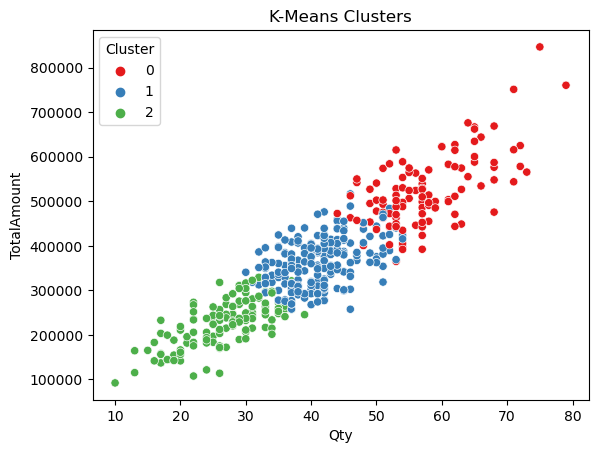

In [173]:
sns.scatterplot(data=clustering_df, x='Qty', y='TotalAmount', hue='Cluster', palette='Set1')
plt.title('K-Means Clusters')
plt.show()

In [174]:
clustering_df.head()

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,0
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,1
4,5,7,27,268600,2


In [175]:
# Counting customer per cluster
cl_count = clustering_df['Cluster'].value_counts().reset_index()
cl_count.columns = ['Cluster','Count']
cl_count['Percentage(%)'] = round((cl_count['Count']/len(clustering_df))*100, 2)
cl_count = cl_count.sort_values(by=['Cluster']).reset_index(drop=True)
cl_count

,Cluster,Count,Percentage(%)
0,0,110,24.61
1,1,202,45.19
2,2,135,30.20


Text(0.5, 1.0, 'Percentage of Customer by Cluster')

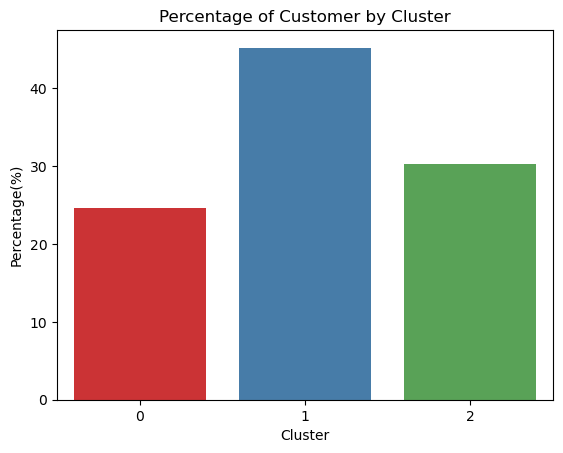

In [176]:
sns.barplot(data=cl_count, x='Cluster', y='Percentage(%)', palette='Set1')
plt.title('Percentage of Customer by Cluster')

# Customer Segmentation Analysis

In [177]:
# clustering_df = clustering_df.drop('CustomerID', axis=1)
clustering_df.groupby('Cluster').agg({
    'CustomerID':'count',
    'TransactionID':['min','mean','max'],
    'Qty':['min','mean','max'],
    'TotalAmount':['min','mean','max']}).T

Cluster                          0              1              2
CustomerID    count     110.000000     202.000000     135.000000
TransactionID min        11.000000       7.000000       3.000000
              mean       15.363636      11.282178       7.785185
              max        21.000000      15.000000      13.000000
Qty           min        44.000000      30.000000      10.000000
              mean       57.636364      41.188119      26.933333
              max        79.000000      54.000000      39.000000
TotalAmount   min    365000.000000  257600.000000   92100.000000
              mean   524504.545455  363267.326733  229388.888889
              max    846700.000000  516600.000000  329300.000000

Although Cluster 1 have the most customer, but Cluster 0 has higher mean for Qty, Total Amount and Transaction. Meanwhile Cluster 2 has the lowest mean for Qty, Total Amount and Transaction.

# Business Recommendation

1. Cluster 0
<br>We must keep this customer, because this Cluster has high value. We can give them like Loyalty Programs for repeat purchases or buy product by passing the limit of shopping and on that program we can give some points and the points can be exchanged with our another product for free.

2. Cluster 1
<br>Most of customer in this Cluster, so we must increase buying rate of the customer. We can give them discount voucher after they bought product, so they consider to buy another product using that voucher.

3. Cluster 2
<br>We must do some campaigns that can make our products become their top of mind to increase the buying rate. We must give them knowledge our product, why must choose and buy our product and we can highlight the good review for our product to proof that our product is good and worth to buy. 